In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [3]:
crime = pd.read_csv("C:\\Users\\ARAVINDH\\Downloads\\crime_data.csv")
crime.head(3)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0


In [ ]:
# Normalization function 

In [4]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [6]:
df_norm = norm_func(crime.iloc[:,1:])
df_norm.head(2)

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240


In [ ]:
#DENDROGRAM

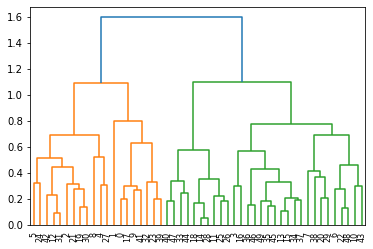

In [11]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [ ]:
#CLUSTER CREATION

In [12]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [13]:
hc

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [15]:
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [34]:
Clusters

,Clusters
0,0
1,0
2,3
3,1
4,3
5,3
6,1
7,1
8,3
9,0


In [18]:
Clusters.head(10)

,Clusters
0,0
1,0
2,3
3,1
4,3
5,3
6,1
7,1
8,3
9,0


In [36]:
Clusters.value_counts()

Clusters
1           20
3           12
2           10
0            8
dtype: int64

In [37]:
#creating new column and assigning into it
crime['clust']=Clusters

In [39]:
crime=crime.iloc[:,:]
crime.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,0


In [ ]:
#Aggregrate mean of each cluster

In [40]:
crime.groupby(crime.clust).mean()

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,14.087500,252.750000,53.500000,24.5375
1,5.715000,132.300000,70.800000,18.1000
2,3.180000,78.700000,49.300000,11.6300
3,10.883333,256.916667,78.333333,32.2500


In [ ]:
#K-MEANS

In [57]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.preprocessing import scale

In [41]:
k = list(range(2,15))

In [43]:
k

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [ ]:
#Total within sum of squares for each kmeans 

In [44]:
TWSS = [] 

In [51]:
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)

In [ ]:
#sum of squares for each cluster 
## scree plot 

In [52]:
WSS = [] 

In [53]:
for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))


In [54]:
TWSS.append(sum(WSS))

ValueError: x and y must have same first dimension, but have shapes (13,) and (1, 1)

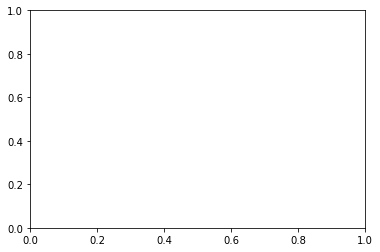

In [58]:
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)

In [ ]:
# Selecting 6 clusters from the above scree plot 

In [59]:
model=KMeans(n_clusters=6).fit(df_norm)

In [61]:
model.labels_

array([1, 3, 3, 4, 5, 5, 0, 4, 3, 1, 0, 2, 3, 4, 2, 4, 4, 1, 2, 3, 0, 3,
       2, 1, 4, 2, 2, 5, 2, 0, 3, 3, 1, 2, 4, 4, 4, 0, 0, 1, 2, 1, 3, 0,
       2, 4, 4, 2, 2, 4])

In [64]:
md=pd.Series(model.labels_)  
md.head(10)

0    1
1    3
2    3
3    4
4    5
5    5
6    0
7    4
8    3
9    1
dtype: int32

In [66]:
crime['clust']=md                             # creating a  new column
crime.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,4
4,California,9.0,276,91,40.6,5
5,Colorado,7.9,204,78,38.7,5
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,4
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,1


In [67]:
crime= crime.iloc[:,:]
crime.iloc[:,:].groupby(crime.clust).mean()

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,4.757143,123.428571,81.857143,16.071429
1,14.671429,251.285714,54.285714,21.685714
2,3.091667,76.000000,52.083333,11.833333
3,11.388889,270.666667,74.222222,30.888889
4,7.058333,152.916667,65.083333,21.000000
5,9.700000,244.000000,83.333333,41.766667
